In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


# DATA UNDERSTANDING

The dataset has information about: <br>
**adr :** average daily rate <br>
**adults :** number of adults <br>
**agent :** ID of the travel agency that made the booking <br>
**arrival_date_day_of_month :** Day of the month of the arrival date <br>
**arrival_date_month :** Month of arrival date with 12 categories: “January” to “December” <br>
**arrival_date_week_number :** Week number of the arrival date <br>
**arrival_date_year :** Year of arrival date <br>
**assigned_room_type :** Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons. <br>
**babies :** Number of babies <br>
**booking_changes :** Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. <br>
**children :** Number of children. <br>
**company :** ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons. <br>
**country :** Country of origin. Categories are represented in the ISO 3155–3:2013 format <br>
**customer_type :** Type of booking, assuming one of four categories : <br>
* Contract - when the booking has an allotment or other type of contract associated to it; <br>
* Group – when the booking is associated to a group; <br>
* Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br>
* Transient-party – when the booking is transient, but is associated to at least other transient booking <br>

**days_in_waiting_list :** Number of days the booking was in the waiting list before it was confirmed to the customer <br>
**deposit_type :** Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
* No Deposit – no deposit was made.
* Non Refund – a deposit was made in the value of the total stay cost.
* Refundable – a deposit was made with a value under the total cost of stay.
<br>

**distribution_channel :** Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”. <br>
**is_canceled :** Value indicating if the booking was canceled (1) or not (0). <br>
**is_repeated_quests :** Value indicating if the booking name was from a repeated guest (1) or not (0). <br>
**lead_time :** Number of days that elapsed between the entering date of the booking into the PMS and the arrival date. <br>
**market_segment :** Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”. <br>

**meal :** Type of meal booked. Categories are presented in standard hospitality meal packages:
* Undefined/SC – no meal package
* BB – Bed & Breakfast
* HB – Half board (breakfast and one other meal – usually dinner)
* FB – Full board (breakfast, lunch and dinner) <br>

**previous_bookings_not_canceled :** Number of previous bookings not cancelled by the customer prior to the current booking. <br>
**previous_cancellations :** Number of previous bookings that were cancelled by the customer prior to the current booking. <br>
**required_car_parking_spaces :** Number of car parking spaces required by the customer. <br>
**reservation_status :** Reservation last status, assuming one of three categories: 
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why
<br>

**reservation_status_date :** Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel. <br>
**reserved_room_type :** Code of room type reserved. Code is presented instead of designation for anonymity reasons. <br>
**stays_in_weekend_nights :** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel. <br>
**stays_in_week_nights :** 	Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel. <br>
**total_of_special_requests :** Number of special requests made by the customer (e.g. twin bed or high floor).


In [2]:
hotel_bookings = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# DATA CLEANING


## Dropping columns

We are going to drop company feature, because most of the values in it are null and the arrival_date_week_number because we will not use it.

In [4]:
hotel_bookings.drop('company',inplace=True,axis=1)
hotel_bookings.drop('arrival_date_week_number',inplace=True,axis=1)

## Handle missing values

There are few columns that have missing values (children, country, agent, company).

In [5]:
hotel_bookings.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             488
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0
customer_type                         0


## Filling Missing Values

We are going to fill the null values:
* For the children and agent features we will use the median value to replace them.
* For the country feature we are going to use the mode method, which will replace the missing values with the most frequent one.

In [6]:
# replace null values with median for children column
hotel_bookings['children'] = hotel_bookings['children'].fillna(hotel_bookings['children'].median())

In [7]:
# replace null values with median for agent column
hotel_bookings['agent'] = hotel_bookings['agent'].fillna(hotel_bookings['agent'].median())

In [8]:
# find which country is more frequent in our data
print(hotel_bookings['country'].mode())

0    PRT
Name: country, dtype: object


In [9]:
# replace null values with the most frequent value in the country column
hotel_bookings['country'].fillna(hotel_bookings['country'].mode()[0], inplace=True)

Let's check our results.

In [10]:
hotel_bookings.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Now that we are done with the null values we can go further and ask questions in our data.

In [11]:
hotel_bookings['arrival_date_year'] = hotel_bookings['arrival_date_year'].apply(str)

## Checking for miswritings

There might be miswritings in our data. Therefore we will check the object columns to see if there are errors. Like, in the column arrival_date_month might be typed "Aug" instead of "August", or in column arrival_date_year might be typed "'15" instead of "2015" etc. But we can see that there are not miswritings here.

In [12]:
#find the unique values on our data

df = pd.DataFrame(hotel_bookings, columns=["hotel", "arrival_date_month","arrival_date_year", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status"])
for col in df:
   print (col, df[col].unique())

hotel ['Resort Hotel' 'City Hotel']
arrival_date_month ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
arrival_date_year ['2015' '2016' '2017']
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI' 'SAU'
 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB' 'NPL'
 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ'

## Check for logical errors
We have three columns (children, adults, babies) that can't be zero all the them at the same row. But we can see that there are 180 rows where all of them are 0.

In [13]:
# filter data

filter = (hotel_bookings.children == 0) & (hotel_bookings.adults == 0) & (hotel_bookings.babies == 0)
hotel_bookings[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,6,0,3,0,0.0,...,1,No Deposit,14.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,12,0,0,0,0.0,...,0,No Deposit,14.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,20,1,2,0,0.0,...,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,30,1,4,0,0.0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,30,2,4,0,0.0,...,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,27,0,3,0,0.0,...,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,30,0,1,0,0.0,...,0,No Deposit,14.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,15,1,1,0,0.0,...,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,15,2,5,0,0.0,...,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [14]:
#drop rows with logical errors

indexguest = hotel_bookings[(hotel_bookings['children'] == 0) & (hotel_bookings['adults'] == 0) & (hotel_bookings['babies'] == 0)].index
hotel_bookings.drop(indexguest , inplace=True)

#reset index to our new dataset
hotel_bookings.reset_index(drop=True, inplace=True)
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Let's check if the rows with the wrong data are dropped. Now our dataset from  119390 rows has 119210 (exactly 180 rows less)

In [15]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119210 entries, 0 to 119209
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  object 
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_day_of_month       119210 non-null  int64  
 6   stays_in_weekend_nights         119210 non-null  int64  
 7   stays_in_week_nights            119210 non-null  int64  
 8   adults                          119210 non-null  int64  
 9   children                        119210 non-null  float64
 10  babies                          119210 non-null  int64  
 11  meal                            119210 non-null  object 
 12  country         

In [16]:
hotel_bookings.to_csv('/kaggle/working/hotel_bookings_clean.csv',index=False)

# DATA ANALYSIS

Let's make a dataset which will include only the people that did not cancel their room reservation. And then we will analyze the data for those that did cancelled.

In [17]:
not_cancelled = hotel_bookings[hotel_bookings['is_canceled'] == 0]
not_cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


Let's ckeck if we have the right dataset. If the there are any values for columns stays_in_weekend_nights and stays_in_week_night have same value 0 or 1, then something is wrong and we have false data. Maybe something wrong with the data entry. Our outcome is False that means we are good to go.

In [18]:
not_cancelled['stays_in_weekend_nights'].equals(not_cancelled['stays_in_week_nights'])

False

The people that did not cancel their reservation is 63% of our data

In [19]:
not_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75011 entries, 0 to 119209
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           75011 non-null  object 
 1   is_canceled                     75011 non-null  int64  
 2   lead_time                       75011 non-null  int64  
 3   arrival_date_year               75011 non-null  object 
 4   arrival_date_month              75011 non-null  object 
 5   arrival_date_day_of_month       75011 non-null  int64  
 6   stays_in_weekend_nights         75011 non-null  int64  
 7   stays_in_week_nights            75011 non-null  int64  
 8   adults                          75011 non-null  int64  
 9   children                        75011 non-null  float64
 10  babies                          75011 non-null  int64  
 11  meal                            75011 non-null  object 
 12  country                         7501

We can observe from the following table that:
* Mean time for them to check in for their room is 80 days.
* Most of them were 2 adults with no kids
* The years that our dataset is about are 2015 until 2017 and the year with the most guest is 2016 (49% of our data)
* Repeated guests are very low.
* The hotel type that was prefered was City Hotel (61% of the guests)
* August was the month with the most traffic.
* Online Travel Agents is prefered for booking, making no deposit.
* Most of the guests wanted a room type A (almost 55% of the dataset).
* Most of the guests were from Portugal (29 % of the dataset)

In [20]:
not_cancelled.describe()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,75011.0,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000,75011.000000
mean,0.0,80.082028,15.838810,0.928064,2.461999,1.833518,0.102558,0.010398,0.042727,0.015758,0.203064,0.289784,81.025703,1.587687,100.169212,0.099412,0.714455
std,0.0,91.137797,8.776488,0.987820,1.907424,0.504148,0.391212,0.113123,0.202242,0.272486,1.812020,0.717243,108.366154,14.781224,49.070644,0.303332,0.834026
min,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.0,9.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,67.760000,0.000000,0.000000
50%,0.0,45.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,92.700000,0.000000,1.000000
75%,0.0,124.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,171.000000,0.000000,125.000000,0.000000,1.000000
max,0.0,737.000000,31.000000,19.000000,50.000000,4.000000,3.000000,10.000000,1.000000,13.000000,72.000000,18.000000,535.000000,379.000000,510.000000,8.000000,5.000000


In [21]:
not_cancelled.describe(include=['O'])

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,75011,75011,75011,75011,75011,75011,75011,75011,75011,75011,75011,75011,75011
unique,2,3,12,5,165,7,5,9,10,3,4,1,805
top,City Hotel,2016,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-12-08
freq,46084,36299,8624,57730,21398,35673,57614,52248,41077,74792,52982,75011,243


# DATA VISUALIZATION

Let's observe the above results in a more visual way

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 1.0, 'Hotel Type Preference')

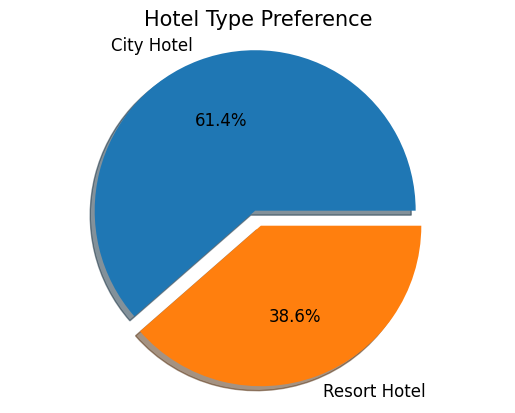

In [23]:
val=not_cancelled.hotel.value_counts()
plt.pie(val,labels=['City Hotel','Resort Hotel'],autopct="%1.1f%%",shadow=True,explode=(0.1,0),textprops={'fontsize': 12})
plt.axis('equal')
plt.title('Hotel Type Preference', fontsize = 15)

Text(0, 0.5, 'Count')

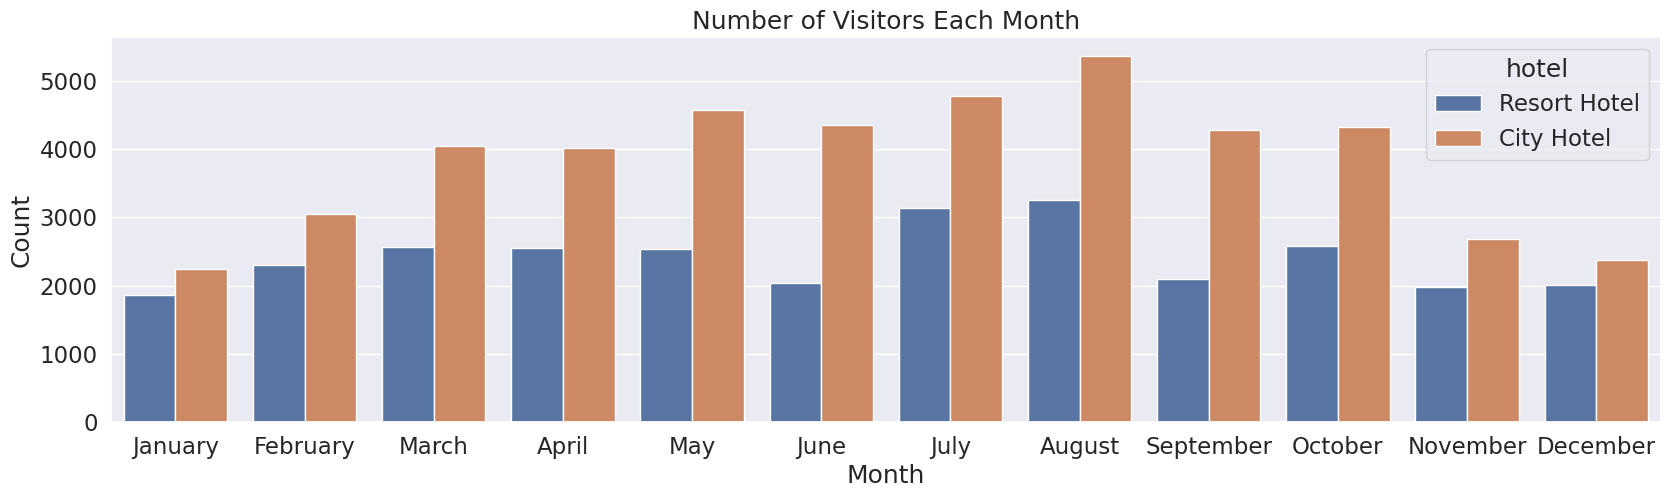

In [24]:
# We can simply use a countplot as we sre visualising categorical data
plt.figure(figsize=(20,5))

# data we will use in a list
l1 = ['hotel','arrival_date_month']

sns.set(font_scale=1.5)
# plotting
sns.countplot(data = not_cancelled[l1],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
 "July","August","September","October","November","December"]).set_title(
'Number of Visitors Each Month')
    
plt.xlabel('Month')
plt.ylabel('Count')




Text(0, 0.5, 'Count')

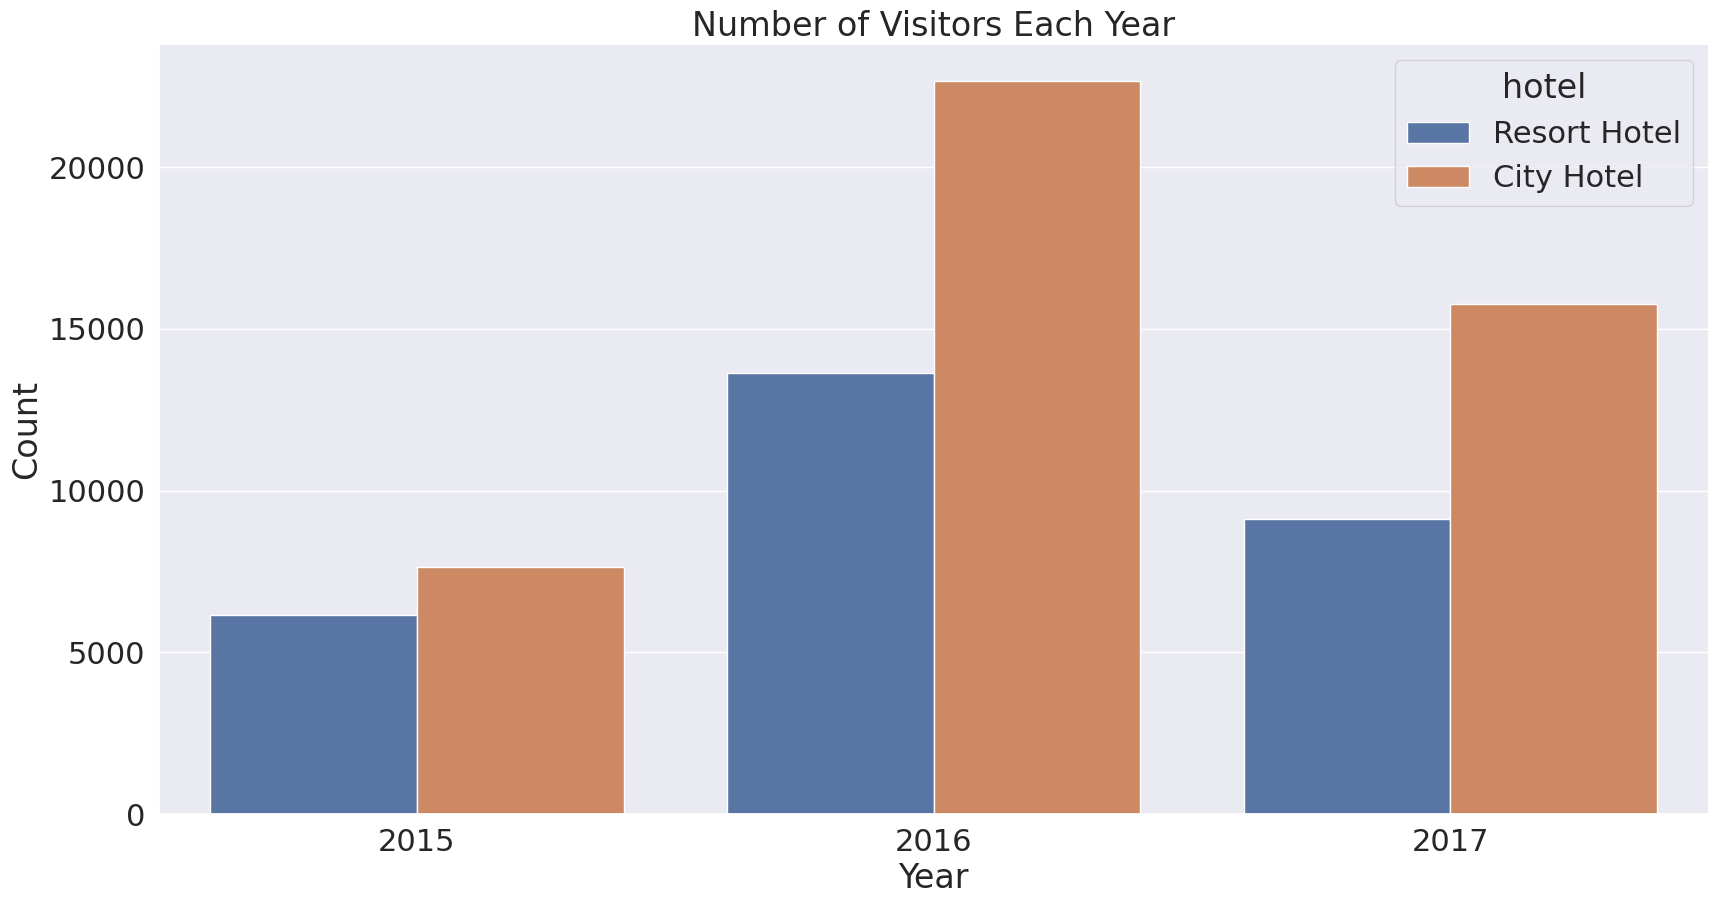

In [25]:
# We can simply use a countplot as we are visualising categorical data

plt.figure(figsize=(20,10))
# data we will use in a list
l2 = ['hotel','arrival_date_year']

sns.set(font_scale=2)
# plotting
sns.countplot(data = not_cancelled[l2],x= "arrival_date_year",hue="hotel",order=["2015","2016","2017"]).set_title(
'Number of Visitors Each Year')
    
plt.xlabel('Year')
plt.ylabel('Count')

<Axes: xlabel='lead_time', ylabel='Count'>

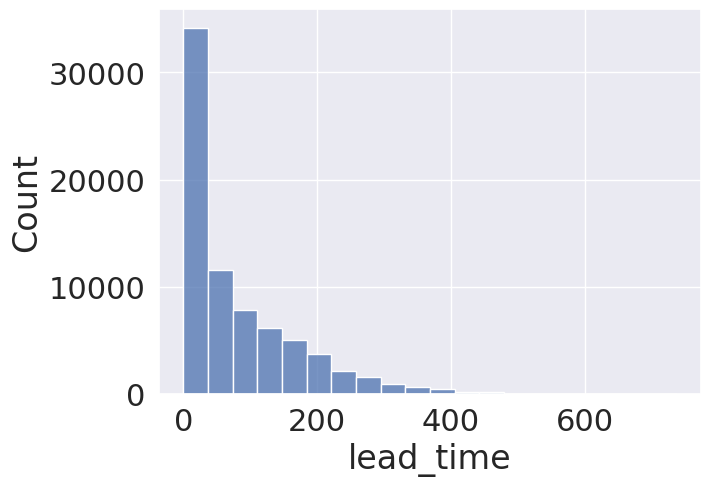

In [26]:
plt.figure(figsize = (7, 5))
sns.histplot(not_cancelled["lead_time"], bins = 20)

Let's check from which country we the guests that checked-in. We will limit our data to the countries that had at least 200 guests, in order to plot the countries with the most guests.

In [27]:
country_counts = not_cancelled['country'].value_counts().reset_index()
country_counts.columns = ['country', 'No of guests']
country_counts

,country,No of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [28]:
indexguest2 = country_counts[(country_counts['No of guests'] < 200)].index
country_counts.drop(indexguest2 , inplace=True)
country_counts

,country,No of guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
5,IRL,2542
6,ITA,2428
7,BEL,1868
8,NLD,1716
9,USA,1592


<Axes: xlabel='country'>

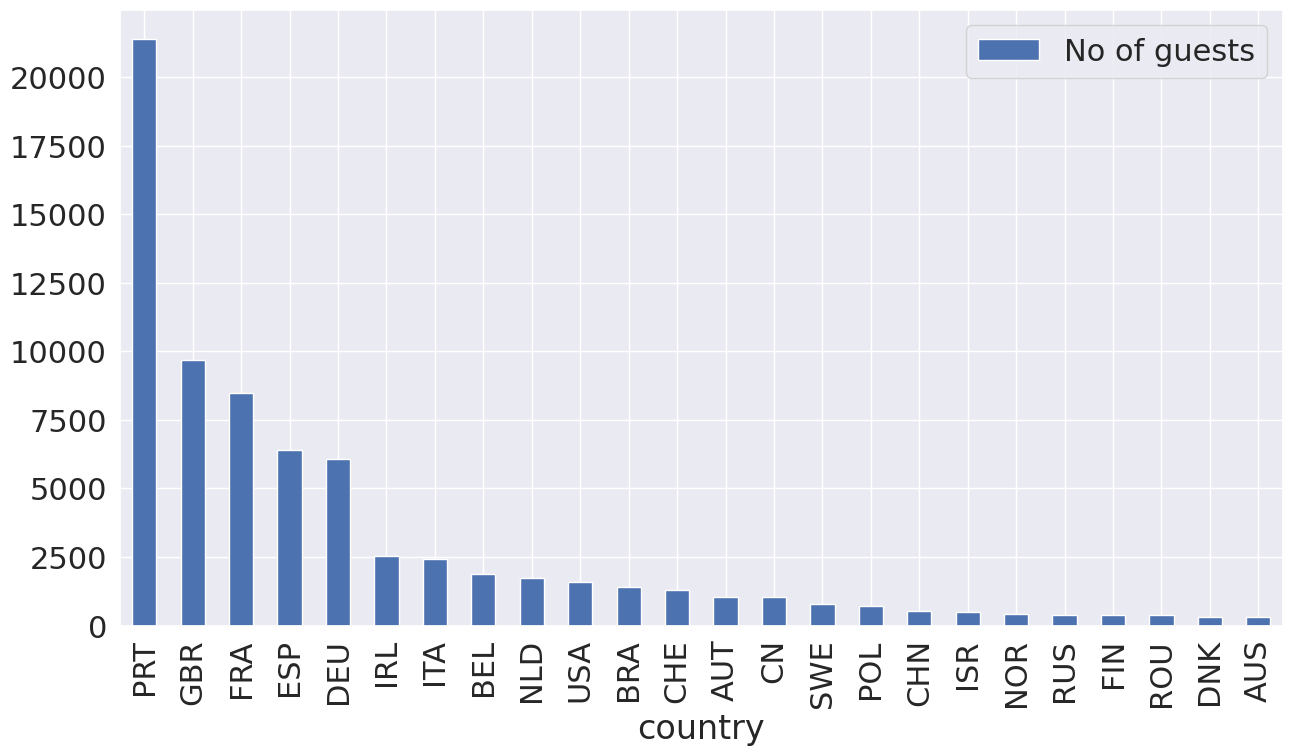

In [29]:
country_counts.plot(kind='bar',x='country',y='No of guests',figsize=(15,8))

# DATA ANALYSIS FOR CANCELLED ROOM

In [30]:
cancelled = hotel_bookings[hotel_bookings['is_canceled'] == 1]
cancelled.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,July,1,0,3,2,0.0,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,1,0,3,2,0.0,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,July,1,0,4,2,0.0,...,0,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,July,1,2,5,2,0.0,...,0,No Deposit,240.0,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,July,1,2,8,2,0.0,...,0,No Deposit,14.0,0,Transient,108.3,0,2,Canceled,2015-05-29


Checking if our dataset is right. By checking the column "reservation_status" we can see that it has only values "Canceled" and "No-show". Therefore, our dataset is right, having only the cancelled data.

In [31]:
cancelled['reservation_status'].unique()

array(['Canceled', 'No-Show'], dtype=object)

In [32]:
cancelled['stays_in_weekend_nights'].equals(cancelled['stays_in_week_nights'])

False

In [33]:
cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44199 entries, 8 to 117115
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44199 non-null  object 
 1   is_canceled                     44199 non-null  int64  
 2   lead_time                       44199 non-null  int64  
 3   arrival_date_year               44199 non-null  object 
 4   arrival_date_month              44199 non-null  object 
 5   arrival_date_day_of_month       44199 non-null  int64  
 6   stays_in_weekend_nights         44199 non-null  int64  
 7   stays_in_week_nights            44199 non-null  int64  
 8   adults                          44199 non-null  int64  
 9   children                        44199 non-null  float64
 10  babies                          44199 non-null  int64  
 11  meal                            44199 non-null  object 
 12  country                         4419

We can observe from the following table that:
* Mean time for them to check in for their room is 144 days. (That means that if the room is booked to many days prior the chech-in day, probably will be cancelled.)
* Most of them were 2 adults with no kids
* Most cancellations were made for City Hotel (75% of the cancellations)
* August had the most cancellations.
* Most cancellations were made from Portugal (62 % of the cancellations)

In [34]:
cancelled.describe()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,44199.0,44199.000000,44199.000000,44199.000000,44199.00000,44199.000000,44199.000000,44199.000000,44199.000000,44199.000000,44199.000000,44199.000000,44199.000000,44199.000000,44199.000000,44199.0,44199.000000
mean,1.0,144.886264,15.730673,0.925338,2.56232,1.902803,0.106563,0.003824,0.012444,0.208421,0.025136,0.098328,69.631168,3.566099,105.023703,0.0,0.328899
std,0.0,118.611795,8.788521,1.007389,1.87780,0.676720,0.411443,0.062447,0.110856,1.332704,0.679133,0.451069,101.270625,21.494677,52.526686,0.0,0.649236
min,1.0,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
25%,1.0,49.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,72.800000,0.0,0.000000
50%,1.0,113.000000,16.000000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,96.300000,0.0,0.000000
75%,1.0,214.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.000000,127.670000,0.0,0.000000
max,1.0,629.000000,31.000000,16.000000,40.00000,55.000000,10.000000,2.000000,1.000000,26.000000,58.000000,16.000000,531.000000,391.000000,5400.000000,0.0,5.000000


In [35]:
cancelled.describe(include=['O'])

,hotel,arrival_date_year,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,44199,44199,44199,44199,44199,44199,44199,44199,44199,44199,44199,44199,44199
unique,2,3,12,5,127,8,5,9,11,3,4,2,902
top,City Hotel,2016,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Canceled,2015-10-21
freq,33079,20324,5237,34506,27563,20735,40136,33625,32943,29669,36494,42993,1373


## COMPARE VISUALY THE GUESTS WHO CANCELLED THE BOOKING AND THOSE WHO CHECKED IN THEIR RESERVATION

Text(0.5, 1.0, 'Cancellation vs Hotel Type')

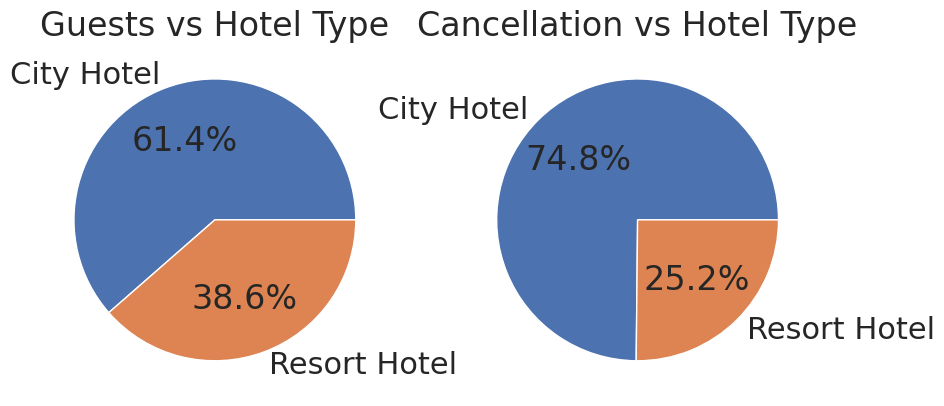

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

# 1,2 denotes 1 row, 2 columns - if you want to stack vertically, it would be 2,1


ax1.pie(not_cancelled['hotel'].value_counts(),
            labels=['City Hotel', 'Resort Hotel'],autopct = '%1.1f%%') #plot first pie
ax1.set_title('Guests vs Hotel Type')



ax2.pie(cancelled['hotel'].value_counts(),
            labels=['City Hotel', 'Resort Hotel'],autopct = '%1.1f%%') #plot second pie
ax2.set_title('Cancellation vs Hotel Type')

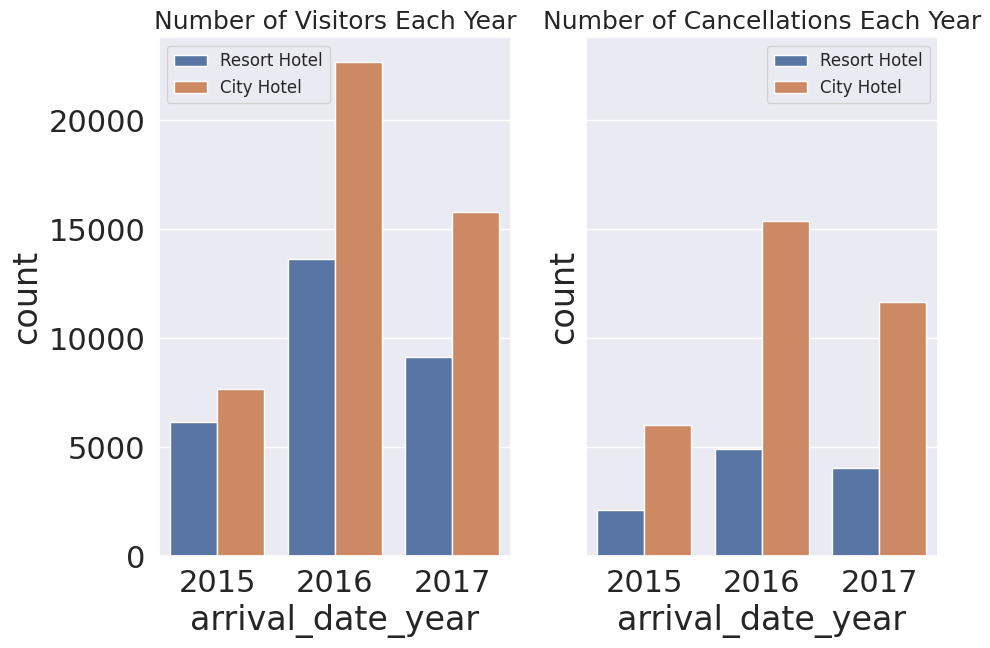

In [37]:
# make two subplots side by side which share the same y-axis

fig, ax =plt.subplots(1,2,figsize=(10,7), sharey=True)
l2 = ['hotel','arrival_date_year']

sns.countplot(not_cancelled[l2],x= "arrival_date_year",hue="hotel",order=["2015","2016","2017"], ax=ax[0]).set_title(
'Number of Visitors Each Year', fontsize=18)

sns.countplot(cancelled[l2],x= "arrival_date_year",hue="hotel",order=["2015","2016","2017"],  ax=ax[1]).set_title(
'Number of Cancellations Each Year', fontsize=18)

#add space
fig.tight_layout()
leg = ax[0].legend(fontsize=12)
leg = ax[1].legend(fontsize=12)

fig.show()  


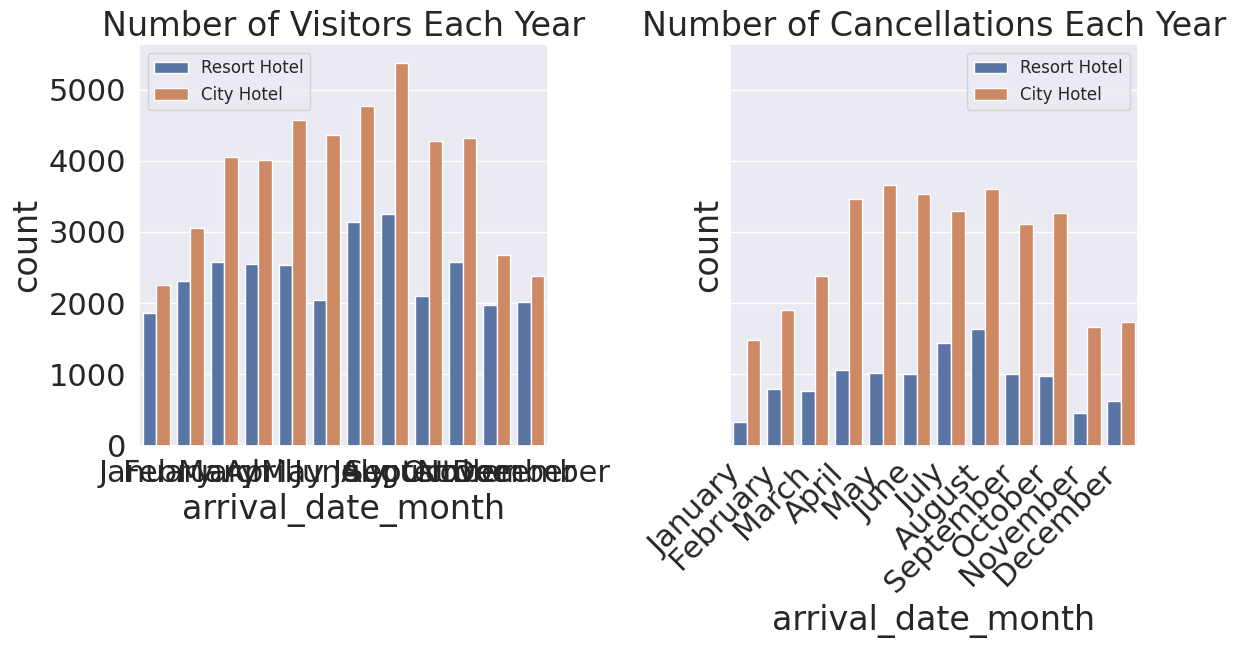

In [38]:
# make two subplots side by side which share the same y-axis

fig, ax =plt.subplots(1,2, figsize=(12,7), sharey=True)

l1 = ['hotel','arrival_date_month']

sns.countplot(not_cancelled[l1],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
 "July","August","September","October","November","December"], ax=ax[0]).set_title(
'Number of Visitors Each Year')

sns.countplot(cancelled[l1],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
 "July","August","September","October","November","December"],  ax=ax[1]).set_title(
'Number of Cancellations Each Year')

# change rotation of x-labels
plt.xticks(rotation=45, ha='right')
leg = ax[0].legend(fontsize=12)
leg = ax[1].legend(fontsize=12)

#add space
fig.tight_layout()
fig.show()  

If you liked my notebook and you want more, you can find a further ADR analysis with the cleaned dataset <a href=https://www.kaggle.com/code/ritaaggelou/hotel-booking-demand-exploring-adr/notebook>here<a>.